A study of how elfin fgm x and y are affected by spin plane. 
Question: will fgm x and y in phase? What if B is not perfectly on spin plane?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Parameters
angle_from_x_axis = 10  # Normal angle from x-axis in degrees
magnitude = 1  # Constant magnitude of the spinning vector
num_points = 1000  # Number of points to plot
theta_increment = 2 * np.pi / num_points

define a plane using two vectors in the plane

In [3]:
# Convert angle to radians
angle_from_x_axis = np.deg2rad(angle_from_x_axis)

# Calculate normal vector of the plane
normal = np.array([np.cos(angle_from_x_axis), np.sin(angle_from_x_axis), 0])

# Find two vectors in the plane
vector_in_plane_1 = np.cross(normal, np.array([0, 0, 1]))
vector_in_plane_2 = np.cross(normal, vector_in_plane_1)

# Normalize the vectors in the plane
vector_in_plane_1 = vector_in_plane_1 / np.linalg.norm(vector_in_plane_1)
vector_in_plane_2 = vector_in_plane_2 / np.linalg.norm(vector_in_plane_2)

define magnetic field perpendicular to spin axis that rotates

In [4]:
# Calculate spinning vector coordinates
x = []
y = []
z = []
for theta in np.arange(0, 2 * np.pi, theta_increment):
    spinning_vector = magnitude * (np.cos(theta) * vector_in_plane_1 + np.sin(theta) * vector_in_plane_2)
    x.append(spinning_vector[0])
    y.append(spinning_vector[1])
    z.append(spinning_vector[2])


plot fgm x and y

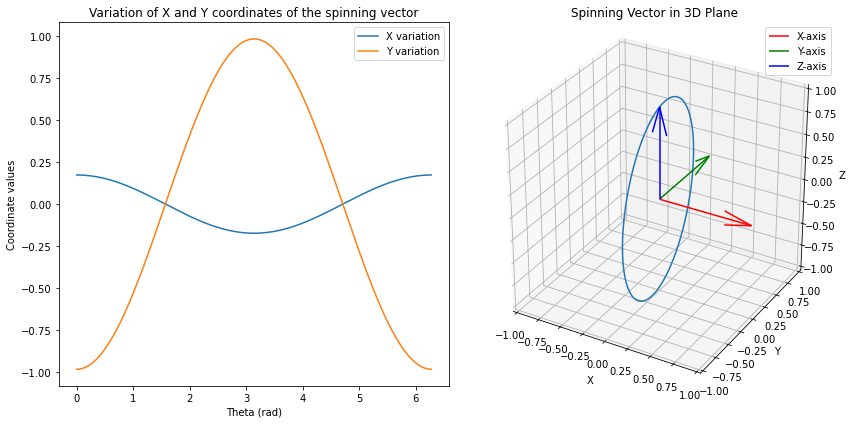

In [5]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, 2 * np.pi, theta_increment), x, label='X variation')
ax1.plot(np.arange(0, 2 * np.pi, theta_increment), y, label='Y variation')
ax1.set_xlabel('Theta (rad)')
ax1.set_ylabel('Coordinate values')
ax1.legend()
ax1.set_title('Variation of X and Y coordinates of the spinning vector')

# Add the second subplot for the 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x, y, z)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spinning Vector in 3D Plane')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
# Make X, Y, Z equal in the 3D plot
ax2.set_box_aspect([1, 1, 1])

# Draw X, Y, Z axes in the origin
ax2.quiver(0, 0, 0, 1, 0, 0, color='r', label='X-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y-axis', linewidth=1.5)
ax2.quiver(0, 0, 0, 0, 0, 1, color='b', label='Z-axis', linewidth=1.5)
ax2.legend()

plt.tight_layout()
plt.show()